## Define a stop loss 

- A stop-loss order specifies that a stock be bought or sold when it reaches a specified price known as the stop price.
- A disadvantage is that a short-term price fluctuation could activate the stop and trigger an unnecessary sale

Since we are working with a trending strategy of 5 days windows we need to know what is the average volatility in a 5 days time windows.

In [12]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

data = pd.read_csv("data/XRP_price_20210608.csv")
data['date'] = data['time'].apply(pd.Timestamp)

NAME='RIPPLE'

count    1599.000000
mean        0.036043
std         0.269031
min        -0.554471
25%        -0.061975
50%        -0.005462
75%         0.060809
max         5.439791
Name: pct_change, dtype: float64

count    1539.000000
mean        0.037329
std         0.273900
min        -0.554471
25%        -0.065266
50%        -0.004752
75%         0.062904
max         5.439791
Name: pct_change, dtype: float64

[-0.18103678 -0.00475185  0.41426488]


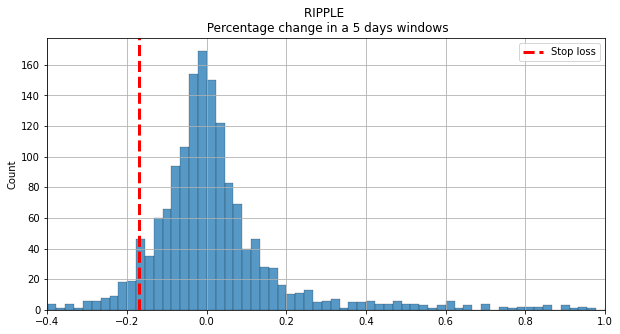

In [33]:

K = 5
data['pct_change'] = data['close'].pct_change(periods=K)
 


data = data[['date','close','pct_change']].dropna()
x_val= data['pct_change'].values
res = np.quantile( x_val, [0.05,0.5,0.95])
display(data['pct_change'].describe())
print(res)

fig,ax = plt.subplots(figsize=(10,5))


sns.histplot(x=x_val,log_scale=False,ax=ax)
plt.xlim(-0.40,1)
ax.axvline(-0.17,lw=3,ls='--',color='red',label='Stop loss')
plt.legend()
plt.grid(True)
plt.title(f'{NAME} \n Percentage change in a {K} days windows')
plt.show()

## Summary

- for 5 days windows define a stop loss base q=0.05 , 5% of the percentage change are below -17%.
- Mening we are willing to loss 17% of our initial investment.